# Face Detection: RetinaFace with Pytorch

https://github.com/deepinsight/insightface/tree/master/detection/retinaface

https://paperswithcode.com/paper/190500641

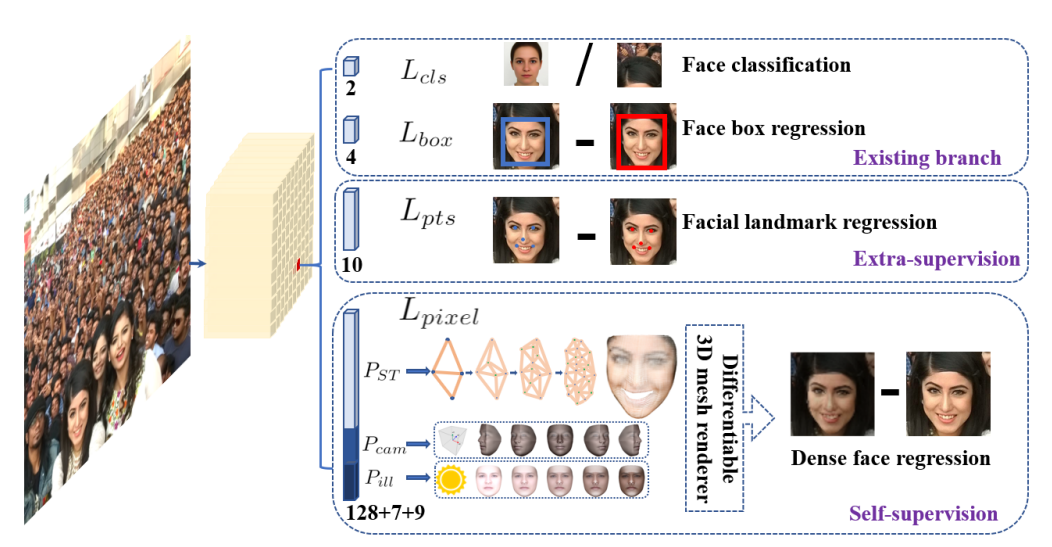

## Connect to Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=1)

Mounted at /content/drive


## Clone Repository

In [ ]:
!git clone https://github.com/mwcnn/Pytorch_Retinaface.git

Cloning into 'Pytorch_Retinaface'...
remote: Enumerating objects: 3012, done.
remote: Counting objects: 100% (2865/2865), done.
remote: Compressing objects: 100% (1164/1164), done.
remote: Total 3012 (delta 1), reused 2861 (delta 1), pack-reused 147
Receiving objects: 100% (3012/3012), 7.26 MiB | 23.03 MiB/s, done.
Resolving deltas: 100% (53/53), done.


In [ ]:
%cd Pytorch_Retinaface

/content/Pytorch_Retinaface


## Prepare Dataset

### Data Training

In [ ]:
# Extract WIDER FACE Dataset to data
!unzip -qq "/content/drive/MyDrive/Face Detection/Datasets/WIDER FACE/widerface.zip" -d "/content/Pytorch_Retinaface/data"
print("Unzip WIDER FACE Done")

Unzip WIDER FACE Done


### Data Testing

In [ ]:
# Extract FDDB Dataset to data
!unzip -qq "/content/drive/MyDrive/Face Detection/Datasets/FDDB/fddb_images.zip" -d "/content/Pytorch_Retinaface/data/FDDB"
print("Unzip FDDB Done")

Unzip FDDB Done


In [ ]:
# Rename folder fddb_images
import os
os.rename('/content/Pytorch_Retinaface/data/FDDB/fddb_images', '/content/Pytorch_Retinaface/data/FDDB/images')
print("Rename folder done")

Rename folder done


### Pre-Trained Model

In [ ]:
# Extract Pretained Model to model
!unzip -qq "/content/drive/MyDrive/Face Detection/Pre-Trained/weights.zip" -d "/content/Pytorch_Retinaface/weights"
print("Unzip Pre-Trained Model Done")

Unzip Pre-Trained Model Done


### Training

In [ ]:
!CUDA_VISIBLE_DEVICES=0,1,2,3 python train.py --network resnet50 --save_folder ./weights/model/

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Printing net...
RetinaFace(
  (body): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1)

In [ ]:
!python test_widerface.py --trained_model /content/Pytorch_Retinaface/weights/model/Resnet50_Final.pth --network resnet50

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Loading pretrained model from /content/Pytorch_Retinaface/weights/model/Resnet50_Final.pth
remove prefix 'module.'
Missing keys:0
Unused checkpoint keys:0
Used keys:456
Finished loading model!
RetinaFace(
  (body): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=

In [ ]:
%cd ./widerface_evaluate
!python setup.py build_ext --inplace
!python evaluation.py

/content/Pytorch_Retinaface/widerface_evaluate
Compiling box_overlaps.pyx because it changed.
[1/1] Cythonizing box_overlaps.pyx
/usr/local/lib/python3.10/dist-packages/Cython/Compiler/Main.py:384: FutureWarning: Cython directive 'language_level' not set, using '3str' for now (Py3). This has changed from earlier releases! File: /content/Pytorch_Retinaface/widerface_evaluate/box_overlaps.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
In file included from /usr/local/lib/python3.10/dist-packages/numpy/core/include/numpy/ndarraytypes.h:1948,
                 from /usr/local/lib/python3.10/dist-packages/numpy/core/include/numpy/ndarrayobject.h:12,
                 from /usr/local/lib/python3.10/dist-packages/numpy/core/include/numpy/arrayobject.h:5,
                 from box_overlaps.c:1176:
/usr/local/lib/python3.10/dist-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: #warning "Using deprecated NumPy API, disable it with " "#define NPY_NO_DEPRECATED_API 

In [ ]:
%cd ..

/content/Pytorch_Retinaface


In [ ]:
!python test_fddb.py --trained_model /content/Pytorch_Retinaface/weights/model/Resnet50_Final.pth --network resnet50

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Loading pretrained model from /content/Pytorch_Retinaface/weights/model/Resnet50_Final.pth
remove prefix 'module.'
Missing keys:0
Unused checkpoint keys:0
Used keys:456
Finished loading model!
RetinaFace(
  (body): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=

In [ ]:
%cd ./fddb_evaluate
!python setup.py build_ext --inplace
!python evaluate.py

[Errno 2] No such file or directory: './fddb_evaluate'
/content/Pytorch_Retinaface/fddb_evaluate
/content/Pytorch_Retinaface/fddb_evaluate/evaluate.py:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from bbox import bbox_overlaps
Reading Predictions : 100% 10/10 [00:00<00:00, 10.11it/s]
Predicting ... :   0% 0/10 [00:00<?, ?it/s]/content/Pytorch_Retinaface/fddb_evaluate/evaluate.py:184: RuntimeWarning: invalid value encountered in double_scalars
  _pr_curve[i, 0] = pr_curve[i, 1] / pr_curve[i, 0]
Predicting ... : 100% 10/10 [00:16<00:00,  1.61s/it]
==================== Results ====================
FDDB-fold-1 Val AP: 0.3055665226162114
FDDB-fold-2 Val AP: 0.24

In [ ]:
%cd ..

/content/Pytorch_Retinaface


In [ ]:
!python detect.py

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Loading pretrained model from ./weights/model/Resnet50_Final.pth
remove prefix 'module.'
Missing keys:0
Unused checkpoint keys:0
Used keys:456
Finished loading model!
RetinaFace(
  (body): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_ru